In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings ('ignore')

In [4]:
df = pd.read_csv('C:/Users/Admin/Desktop/ml/train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [5]:
df.shape

(800, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [12]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [13]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [14]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


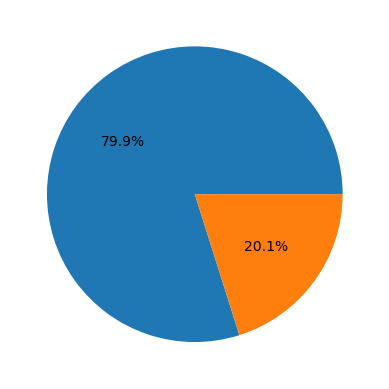

In [15]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [16]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

In [18]:
print(ints)

[]


In [19]:
if 'ID' in ints:
    ints.remove('ID')

if 'Class/ASD' in ints:
    ints.remove('Class/ASD')

In [20]:
print([col for col in df.columns if 'id' in col.lower() or 'class' in col.lower()])

['ID', 'Class/ASD']


In [21]:
ints = df.select_dtypes(include=['int64']).columns.tolist()
print(ints)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']


In [22]:
ints.remove('ID')
ints.remove('Class/ASD')

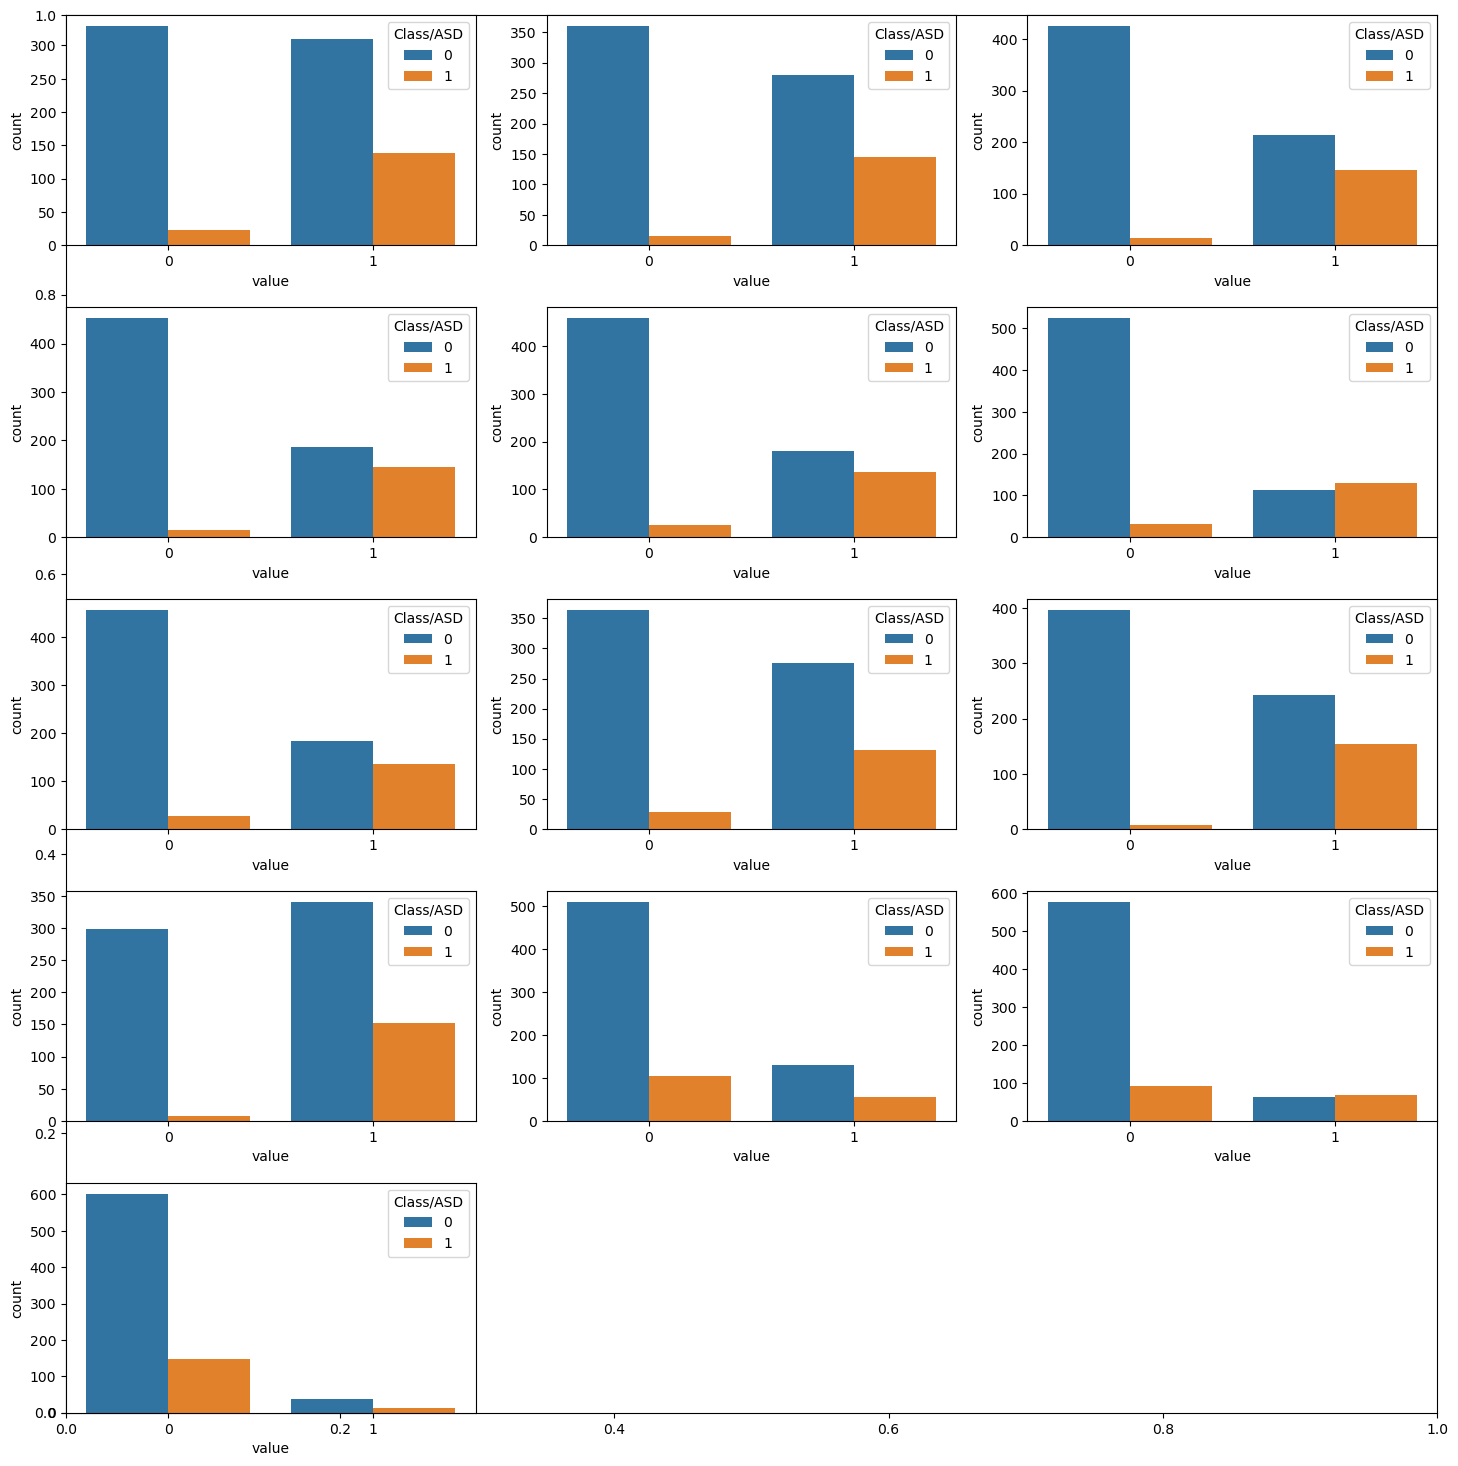

In [23]:
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)

  sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col]) 

plt.tight_layout()
plt.show()

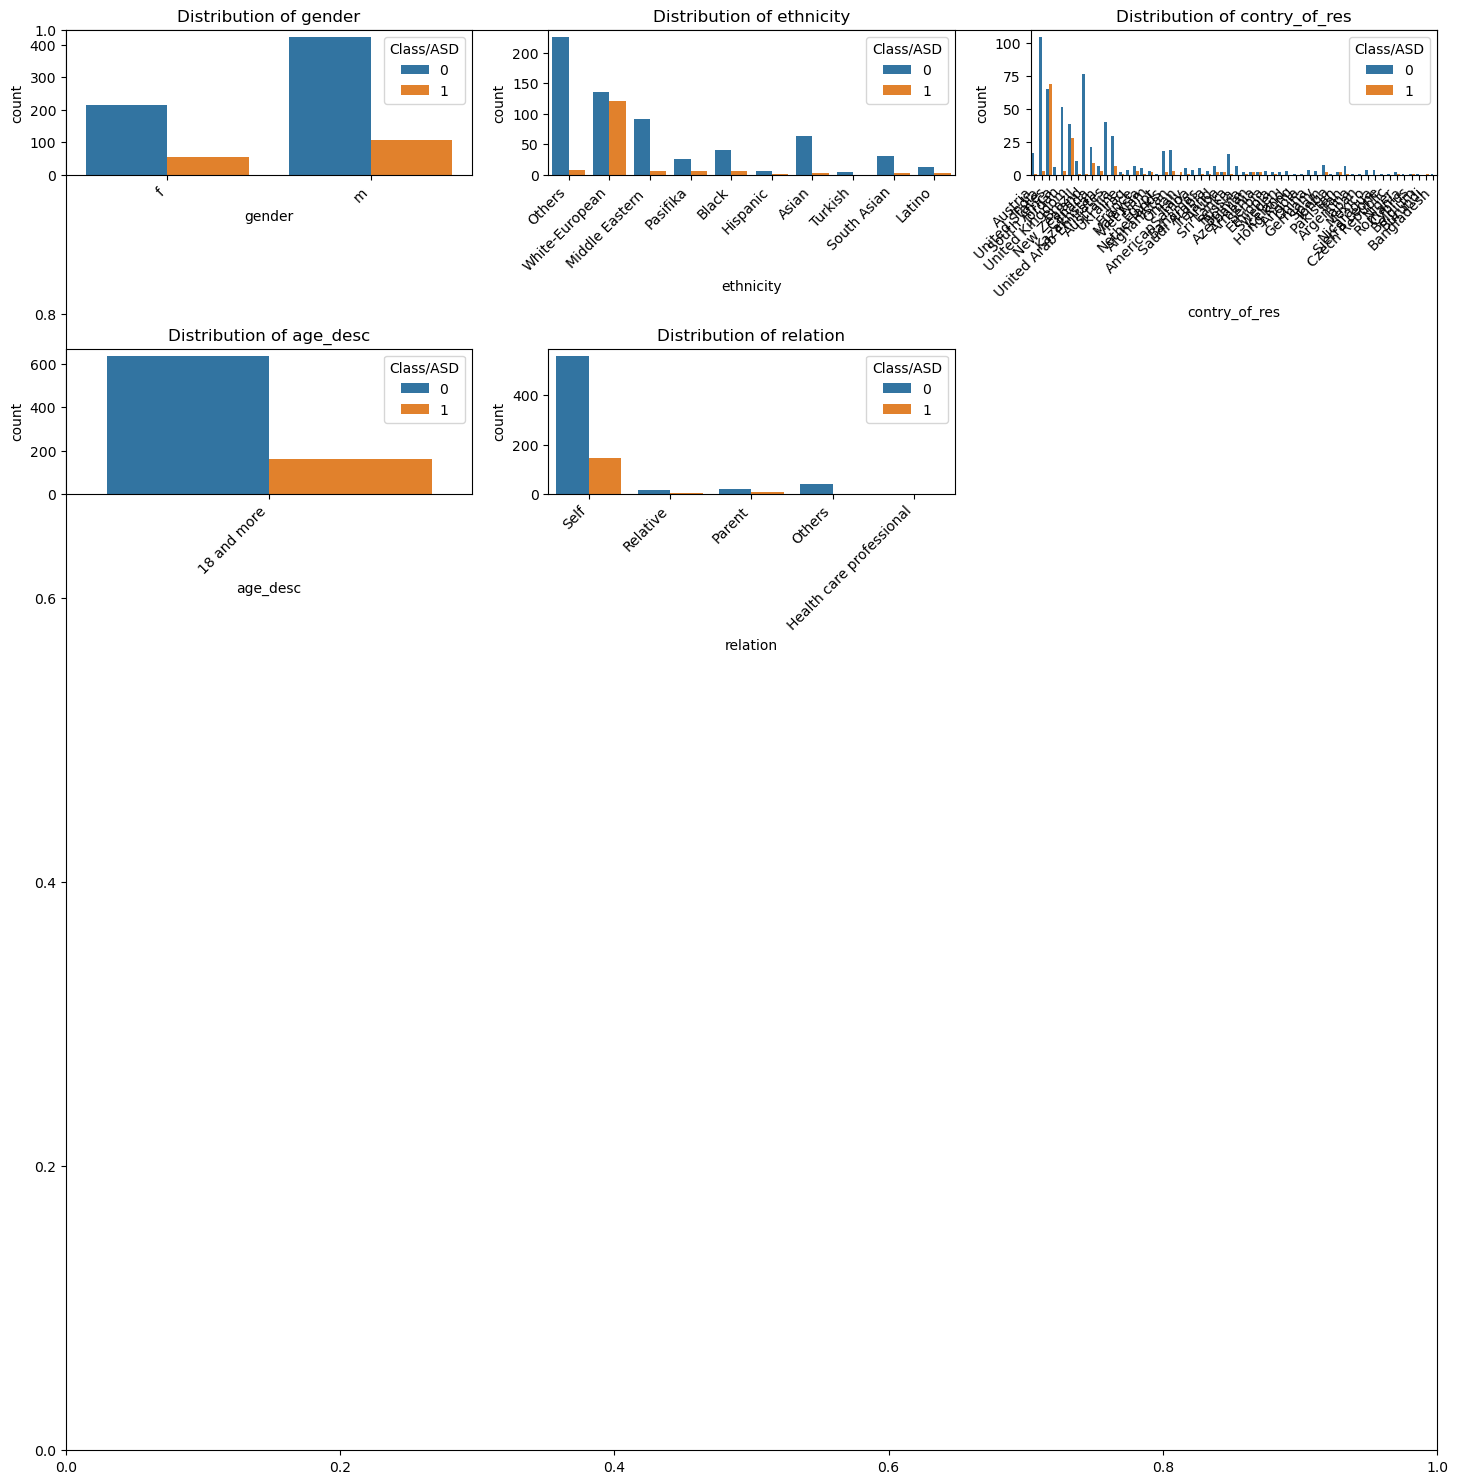

In [26]:
plt.subplots(figsize=(15, 15))  

for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)  
    sb.countplot(x=col, hue='Class/ASD', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

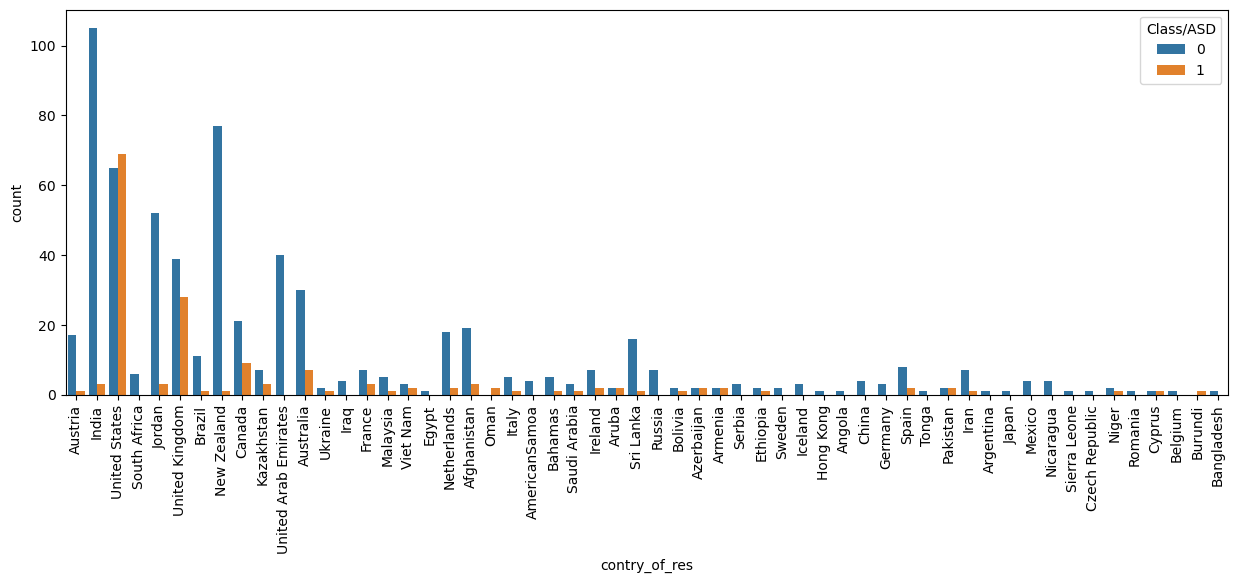

In [27]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

ValueError: num must be an integer with 1 <= num <= 2, not 3

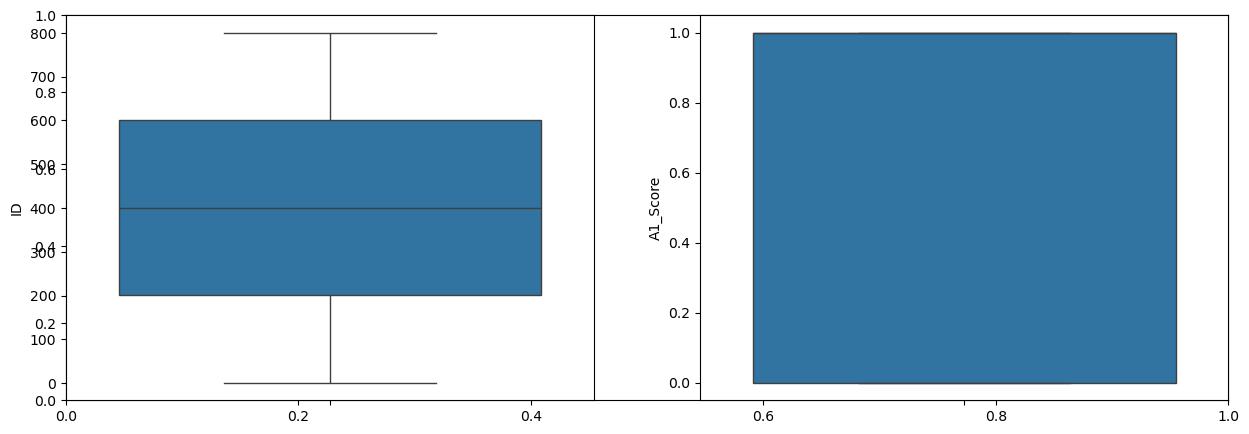

In [29]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [32]:
df = df[df['result']>-5]
df.shape

(798, 22)

In [33]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

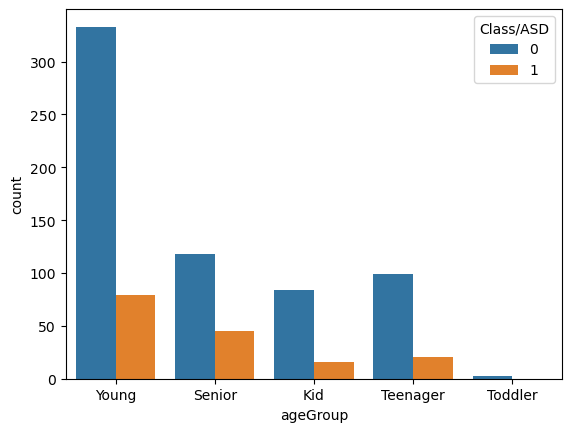

In [34]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [38]:
def add_feature(data):   ###M2
    
    # Creating a column with all values zero
    data['sum_score'] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
        
        #updating the 'sum_score' value with scores
        # from A1 to A10
        data['sum_score'] += data[col]
        
    #creating a random data using the below three columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']
    
    return data

df = add_feature(df)

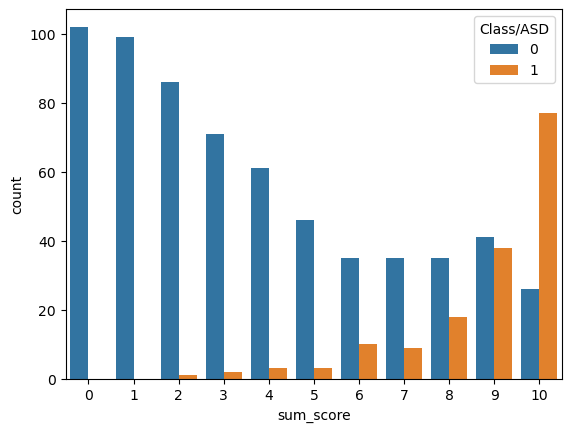

In [39]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [40]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

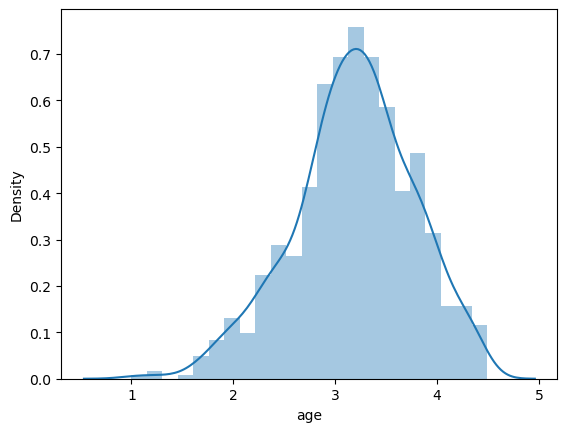

In [41]:
sb.distplot(df['age'])
plt.show()

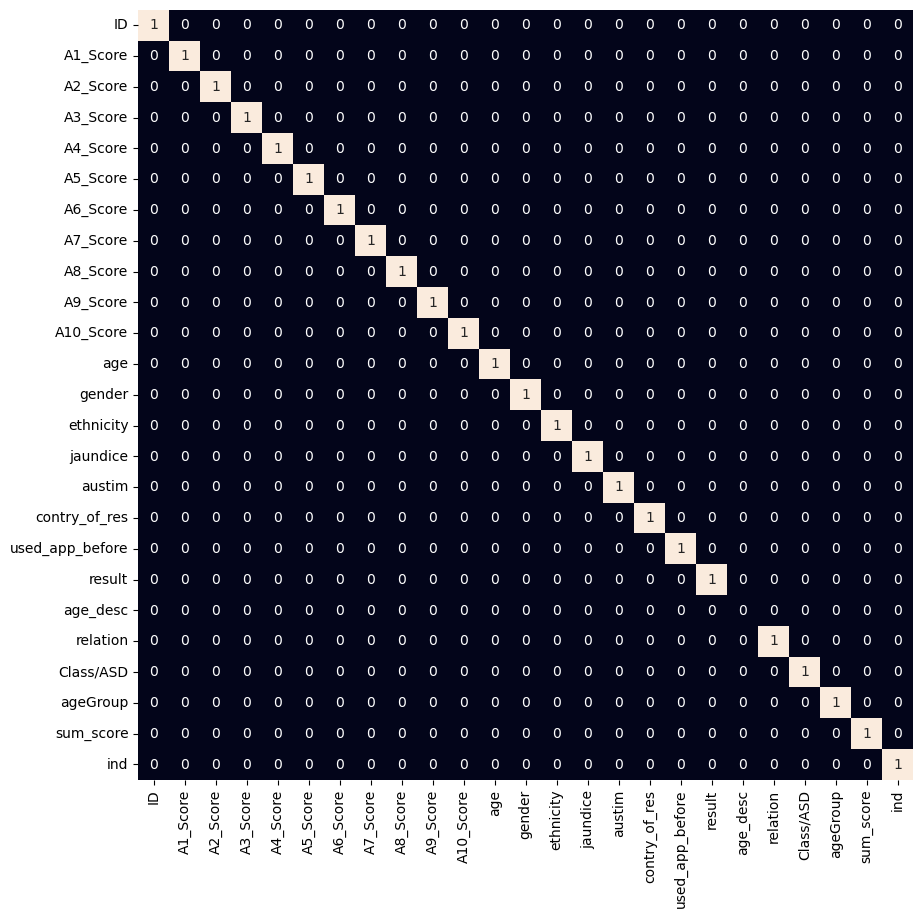

In [42]:
def encode_labels(data):
    for col in data.columns:
        
        
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            
    return data

df = encode_labels(df)

#Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()> 0.8, annot=True, cbar=False)
plt.show()

In [43]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [45]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape,Y.shape

((1026, 20), (1026,))

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [47]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X,Y)
    
    print(f'{model}: ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val,model.predict(X_val)))
    print()

LogisticRegression(): 
Training Accuracy :  0.8664717348927876
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...): 
Training Accuracy :  1.0
Validation Accuracy :  0.7491039426523298

SVC(): 
Training Accuracy :  0.9405458089668616
Validation Accur

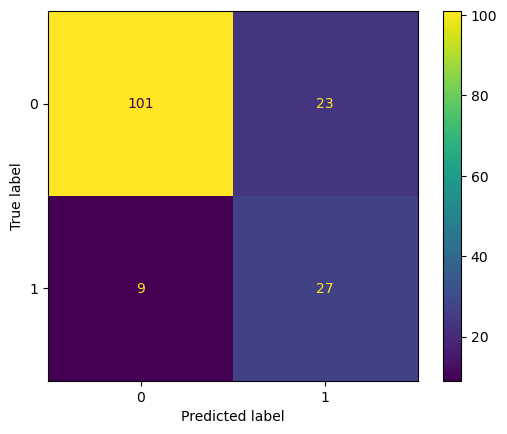

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay    

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Sample dataset: [Eye Contact, Speech Delay, Repetitive Behavior] → [Autism (1) / No Autism (0)]
X = np.array([[1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1]])
y = np.array([1, 1, 0, 1, 0, 0])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating model
accuracy=accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:",accuracy)


Naive Bayes Accuracy: 0.5


In [50]:
### K-MEANS CLUSTERING ALGORITHM  

from sklearn.cluster import KMeans

# Dataset
X = np.array([[1, 1, 1], [1, 0, 1], [0, 1, 0], [1, 1, 0], [0, 0, 1], [0, 1, 1]])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Printing cluster assignments
print("Cluster Assignments:",kmeans.labels_)

Cluster Assignments: [1 1 0 0 1 1]


In [63]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('C:/Users/Admin/Desktop/ml/train.csv')
df = df.drop(columns=[col for col in ['ID', 'result', 'age_desc', 'relation'] if col in df.columns])

# Encode categorical features
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Train model
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']
model = LogisticRegression(max_iter=1000)
model.fit(X, y) 

# Collect user input
person_data = {
    'A1_Score': int(input("A1 Score (0 or 1): ")),
    'A2_Score': int(input("A2 Score (0 or 1): ")),
    'A3_Score': int(input("A3 Score (0 or 1): ")),
    'A4_Score': int(input("A4 Score (0 or 1): ")),
    'A5_Score': int(input("A5 Score (0 or 1): ")),
    'A6_Score': int(input("A6 Score (0 or 1): ")),
    'A7_Score': int(input("A7 Score (0 or 1): ")),
    'A8_Score': int(input("A8 Score (0 or 1): ")),
    'A9_Score': int(input("A9 Score (0 or 1): ")),
    'A10_Score': int(input("A10 Score (0 or 1): ")),
    'age': int(input("Age (e.g., 25): ")),
    'gender': input("Gender (m/f): "),
    'ethnicity': input("Ethnicity (e.g., White-European): "),
    'jaundice': input("Jaundice at birth? (yes/no): "),
    'austim': input("Family history of autism? (yes/no): "),
    'contry_of_res': input("Country of residence: "),
    'used_app_before': input("Used screening app before? (yes/no): ")
}

# Convert input to DataFrame
input_df = pd.DataFrame([person_data])

# Encode user input using same encoders
for col in input_df.columns:
    if col in label_encoders:
        le = label_encoders[col]
        if input_df[col][0] not in le.classes_:
            le.classes_ = np.append(le.classes_, input_df[col][0])
        input_df[col] = le.transform(input_df[col].astype(str))

# Match training column order
input_df = input_df[X.columns]

# Make prediction
prediction = model.predict(input_df)[0]
result = "Likely Autistic" if prediction == 1 else "Unlikely Autistic"

# Show result
print("\n🎯 Prediction Result:", result)

# Show confidence
prob = model.predict_proba(input_df)[0][1]
print(f"Confidence (autistic): {prob:.2f}")

A1 Score (0 or 1):  0
A2 Score (0 or 1):  1
A3 Score (0 or 1):  0
A4 Score (0 or 1):  1
A5 Score (0 or 1):  1
A6 Score (0 or 1):  0
A7 Score (0 or 1):  1
A8 Score (0 or 1):  0
A9 Score (0 or 1):  1
A10 Score (0 or 1):  1
Age (e.g., 25):  23
Gender (m/f):  m
Ethnicity (e.g., White-European):  indian
Jaundice at birth? (yes/no):  no
Family history of autism? (yes/no):  no
Country of residence:  india
Used screening app before? (yes/no):  no



🎯 Prediction Result: Unlikely Autistic
Confidence (autistic): 0.27
